#  <center><span style="color:blue;font-family: serif">Logistic Regression</span></center>
<center><table>
                    <tr style="background-color: yellow;">
                        <th>Author name</th>
                        <th>Company name</th>
                    </tr>
                    <tr>
                        <td>Abdellatif BELMADY</td> <td> Other Ways </td>
                    </tr>
                   
                
</table></center>

#  <b>Summary</b>



> The context


> Probability of Surviving


> Likelihood


> What is Scikit-learn?


> Prep Data with Pandas


> Build a Logistic Regression Model with Sklearn


> Make Predictions with the Model


> Score the Model

















## The context

In order to exlain the Logistic Regression we will study the example of Titanic Datasets.

## Probability of Surviving

In order to determine the best possible line to split our data, we need to have a way of scoring the line. First, let’s look at a single datapoint.

Ideally, if the datapoint is a passenger who survived, it would be on the right side of the line and far from the line. If it’s a datapoint for a passenger who didn’t survive, it would be far from the line to the left. The further it is from the line, the more confident we are that it’s on the correct side of the line.

For each datapoint, we’ll have a score that’s a value between 0 and 1. We can think of it as the probability that the passenger survives. If the value is close to 0 that point would be far to the left of the line and that means we’re confident the passenger didn’t survive. If the value is close to 1 that point would be far to the right of the line and that means we’re confident the passenger did survive. A value of 0.5 means the point falls directly on the line and we are uncertain if the passenger survives.

The equation for calculating this score is below, though the intuition for it is far more important that the actual equation.

Recall that the equation for the line is in the form 0 = ax+by+c (x is the Fare, y is the Age, and a, b & c are the coefficients that we control). The number e is the mathematical constant, approximately 2.71828.


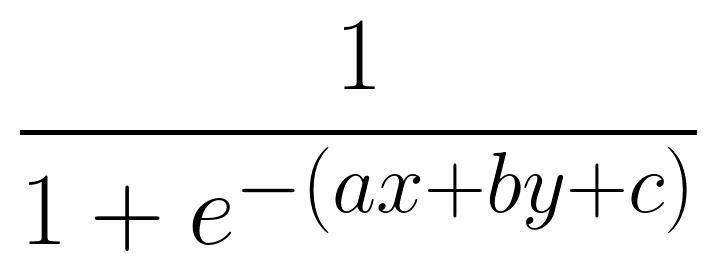

This function is called the sigmoid.



✅ Logistic Regression gives not just a prediction (survived or not), but a probability (80% chance this person survived).

## Likelihood

To calculate how good our line is, we need to score whether our predictions are correct. Ideally if we predict with a high probability that a passenger survives (meaning the datapoint is far to the right of the line), then that passenger actually survives.

So we’ll get rewarded when we predict something correctly and penalized if we predict something incorrectly.
Here’s the likelihood equation. Though again, the intuition is more important than the equation.

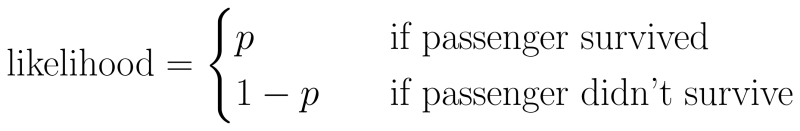

Here p is the predicted probability of surviving from the previous part.

The likelihood will be a value between 0 and 1. The higher the value, the better our line is.

Let’s look at a couple possibilities:
• If the predicted probability p is 0.25 and the passenger didn’t survive, we get a score of 0.75 (good).
• If the predicted probability p is 0.25 and the passenger survived, we get a score of 0.25 (bad).

We multiply all the individual scores for each datapoint together to get a score for our line. Thus we can compare different lines to determine the best one.

Let’s say for ease of computation that we have 4 datapoints.

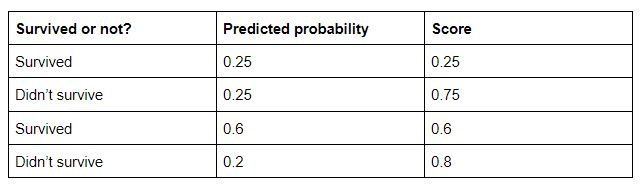

We get the total score by multiplying the four scores together:




```
0.25 * 0.75 * 0.6 * 0.8 = 0.09
```



The value is always going to be really small since it is the likelihood that our model predicts everything perfectly. A perfect model would have a predicted probability of 1 for all positive cases and 0 for all negative cases.

✅ The likelihood is how we score and compare possible choices of a best fit line.

## What is Scikit-learn?

Now that we’ve built up the foundation of how Logistic Regression works, let’s dive into some code to build a model.

For this we’re going to introduce a new Python module called <b>scikit-learn</b>. Scikit-learn, often shortened to <b>sklearn</b>, is our scientific toolkit.

All of the basic machine learning algorithms are implemented in sklearn. We’ll see that with just a few lines of code we can build several different powerful models.

Note that scikit-learn is continually being updated. If you have a slightly different version of the module installed on your computer, everything will still work correctly, but you might see slightly different values than in the playground.

✅ Scikit-learn is one of the best documented Python modules out there. You can find lots of code samples at [scikit-learn.org](https://scikit-learn.org/stable/)

## Prep Data with Pandas

Before we can use sklearn to build a model, we need to prep the data with Pandas. Let’s go back to our full dataset and review the Pandas commands.

Here’s a Pandas DataFrame of data with all the columns:

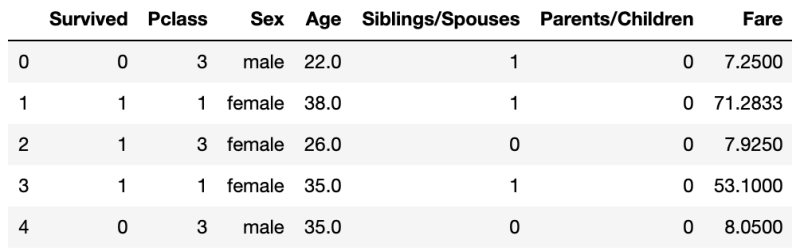

First, we need to make all our columns numerical. Recall how to create the boolean column for Sex.



```
df['male'] = df['Sex'] == 'male'
```



Now, let’s take all the features and create a numpy array called X. We first select all the columns we are interested in and then use the values method to convert it to a numpy array.



```
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
```



Now let’s take the target (the Survived column) and store it in a variable y.



```
y = df['Survived'].values
```



⏸ Run this code to see the results:

In [ ]:
import pandas as pd
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
print(X)
print(y)

✅ It’s standard practice to call our 2d array of features X and our 1d array of target values y.

## Build a Logistic Regression Model with Sklearn

We start by importing the Logistic Regression model:



```
from sklearn.linear_model import LogisticRegression 
```



All sklearn models are built as Python classes. We first instantiate the class.



```
model = LogisticRegression()
```



Now we can use our data that we previously prepared to train the model. The fit method is used for building the model. It takes two arguments: X (the features as a 2d numpy array) and y (the target as a 1d numpy array).

For simplicity, let’s first assume that we’re building a Logistic Regression model using just the Fare and Age columns. First we define X to be the feature matrix and y the target array.



```
X = df[['Fare', 'Age']].values
y = df['Survived'].values
```



Now we use the fit method to build the model.



```
model.fit(X, y)
```



Fitting the model means using the data to choose a line of best fit. We can see the coefficients with the coef_ and intercept_ attributes.



```
print(model.coef_, model.intercept_)
```



⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
X = df[['Fare', 'Age']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

print(model.coef_, model.intercept_)
# [[ 0.01615949 -0.01549065]] [-0.51037152]

These values mean that the equation is as follows:



```
0 = 0.0161594x + -0.01549065y + -0.51037152
```



Here’s the line drawn on the graph. You can see it does a decent (but not great) job of splitting the yellow and purple points. We’ve handicapped ourselves a bit by only using 2 of our features, so in the next parts we’ll use all of the features.

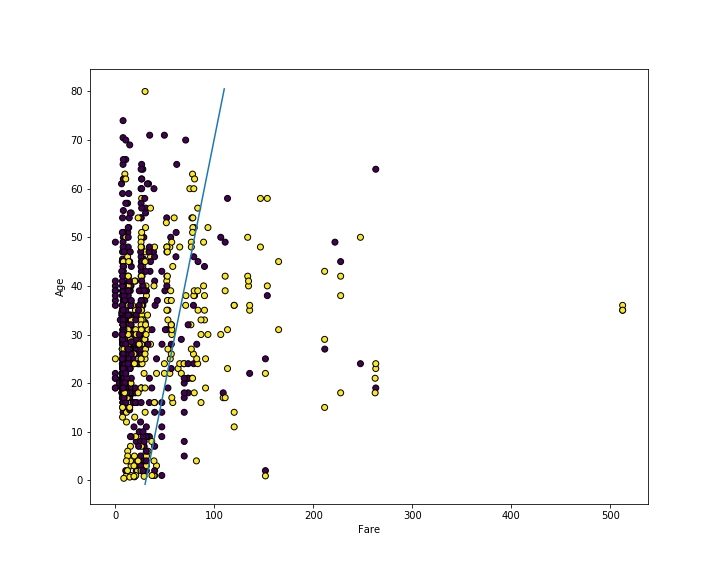

✅ It can be hard to remember the import statements for the different sklearn models. If you can’t remember, just look at the scikit-learn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

## Make Predictions with the Model

We really handicapped our model by only using two of the features in the previous parts, so let’s rebuild the model with all of them.



```
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values
model = LogisticRegression()
model.fit(X, y)
```



Now we can use the predict method to make predictions.



```
model.predict(X)
```



The first passenger in the dataset is:



```
[3, True, 22.0, 1, 0, 7.25]
```



This means the passenger is in Pclass 3, are male, are 22 years old, have 1 sibling/spouse aboard, 0 parents/child aboard, and paid $7.25. Let’s see what the model predicts for this passenger. Note that even with one datapoint, the predict method takes a 2-dimensional numpy array and returns a 1-dimensional numpy array.



```
print(model.predict([[3, True, 22.0, 1, 0, 7.25]])) 
# [0]
```



The result is 0, which means the model predicts that this passenger did not survive.

Let’s see what the model predicts for the first 5 rows of data and compare it to our target array. We get the first 5 rows of data with X[:5] and the first 5 values of the target with y[:5].





```
print(model.predict(X[:5])) 
# [0 1 1 1 0]
print(y[:5]) 
# [0 1 1 1 0]
```



⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

print(model.predict([[3, True, 22.0, 1, 0, 7.25]]))
print(model.predict(X[:5]))
print(y[:5])

We see that it got all 5 correct!

✅ The predict method returns an array of 1’s and 0’s, where 1 means the model predicts the passenger survived and 0 means the model predicts the passenger didn’t survive.

## Score the Model

We can get a sense of how good our model is by counting the number of datapoints it predicts correctly. This is called the accuracy score.

Let’s create an array that has the predicted y values.



```
y_pred = model.predict(X)
```



Now we create an array of boolean values of whether or not our model predicted each passenger correctly.



```
y == y_pred
```



To get the number of these that are true, we can use the numpy sum method.



```
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
print((y == y_pred).sum())
```



This means that of the 887 datapoints, the model makes the correct prediction for 714 of them.

To get the percent correct, we divide this by the total number of passengers. We get the total number of passengers using the shape attribute.



```
y.shape[0]
```



Thus our accuracy score is computed as follows.



```
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
print((y == y_pred).sum() / y.shape[0])
```



Thus the model’s accuracy is 80%. In other words, the model makes the correct prediction on 80% of the datapoints.

This is a common enough calculation, that sklearn has already implemented it for us. So we can get the same result by using the score method. The score method uses the model to make a prediction for X and counts what percent of them match y.



```
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
print(model.score(X, y))
```



With this alternative method of calculating accuracy, we get the same value, 80%.

⏸ Run this code to see the results:

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

model = LogisticRegression()
model.fit(X, y)

y_pred = model.predict(X)
print((y == y_pred).sum())
print((y == y_pred).sum() / y.shape[0])
print(model.score(X, y))

✅ We’ll see in the next module that there’s a lot more to evaluating a model.

# **Contact us** 


🅾[Please visit our GitHub for more Nootebooks](https://github.com/Other-Ways/Logistic-Regression)

🅾[Please visit our Youtube Channel for more Explanations](https://www.youtube.com/channel/UCQvHkW_OVcb70Hrmx-YBZ4w)

🅾[Please visit our Facebook Group for more Posts](https://www.facebook.com/groups/5561422427252705/)

🅾[Please visit our Linkedin profile for more Posts](https://www.linkedin.com/company/other-ways25/)